In [1]:
import pandas as pd
data_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-Workshop/master/Chapter02/Datasets/data.csv'
df = pd.read_csv(data_url)

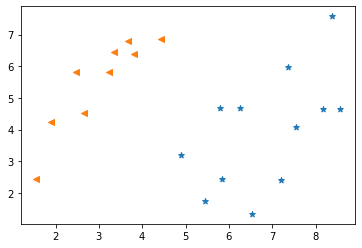

In [2]:
import matplotlib.pyplot as plt 

plt.scatter(df[df['label'] == 0]['x1'],
            df[df['label'] == 0]['x2'],
           marker='*')
plt.scatter(df[df['label'] == 1]['x1'],
           df[df['label'] == 1]['x2'],
           marker='<')

In [3]:
X_input = df[['x1', 'x2']].values
y_label = df[['label']].values

In [4]:
import tensorflow as tf
x = tf.Variable(X_input, dtype=tf.float32)
y = tf.Variable(y_label, dtype=tf.float32)

In [18]:
Number_of_features = 2
Number_of_units = 1
learning_rate = 0.01

# weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))  
bias = tf.Variable(tf.zeros([Number_of_units]))

#optimizer
optimizer = tf.optimizers.SGD(learning_rate)

def perceptron(x):
    z = tf.add(tf.matmul(x, weight), bias)
    output = tf.sigmoid(z)
    return output

def train(n):
    for i in range(n):
        loss = lambda:abs(
            tf.reduce_mean(
                tf.nn.sigmoid_cross_entropy_with_logits(
                    labels=y, logits=perceptron(x)
                )
            )
        )
        optimizer.minimize(loss, [weight, bias])

# train the perceptron
train(1000)

In [19]:
tf.print(weight, bias)

[[-0.844034135]
 [0.673354745]] [0.0593948]


In [20]:
ypred = perceptron(x)
print(ypred)

tf.Tensor(
[[0.7040849 ]
 [0.5992295 ]
 [0.78788173]
 [0.8682634 ]
 [0.82667416]
 [0.77490306]
 [0.75862265]
 [0.7183017 ]
 [0.8226412 ]
 [0.02785094]
 [0.01199546]
 [0.01034805]
 [0.03318095]
 [0.03812481]
 [0.12624106]
 [0.15507515]
 [0.10669854]
 [0.11122626]
 [0.13002671]
 [0.01722958]
 [0.02398301]], shape=(21, 1), dtype=float32)


In [21]:
ypred = tf.round(ypred)
print(ypred)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(21, 1), dtype=float32)


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
acc = accuracy_score(y.numpy(), ypred.numpy())
print(acc)

1.0


In [24]:
print(df)

    label      x1      x2
0       1  2.6487  4.5192
1       1  1.5438  2.4443
2       1  1.8990  4.2409
3       1  2.4711  5.8097
4       1  3.3590  6.4423
5       1  3.2406  5.8097
6       1  3.8128  6.3917
7       1  4.4441  6.8725
8       1  3.6747  6.7966
9       0  7.5417  4.0891
10      0  7.2063  2.3937
11      0  6.5355  1.3310
12      0  5.4503  1.7358
13      0  5.8449  2.4443
14      0  4.8979  3.1781
15      0  5.8055  4.6711
16      0  7.3641  5.9868
17      0  6.2592  4.6711
18      0  8.3703  7.5810
19      0  8.5676  4.6457
20      0  8.1676  4.6457


In [26]:
cnf_matrix = confusion_matrix(y.numpy(), ypred.numpy())
print(cnf_matrix)

[[12  0]
 [ 0  9]]
